In [41]:
#Alumno: Luis Serrano Acevedo
#Actividad K-means

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score


Implementación y visualización de k-means en 2D

In [31]:
#Instrucción 2.1.2 Cargar la base de datos kmeans1.csv utilizando pandas
data = 'C:/Users/ACER/Downloads/kmeans.1.csv'  # Ruta del archivo cargado
data = pd.read_csv(data)

data.head()

,A,B
0,-3.032505,-3.367918
1,-2.603797,-1.616394
2,-1.357223,-0.199628
3,-2.992206,-3.523316
4,-1.708192,-1.007209


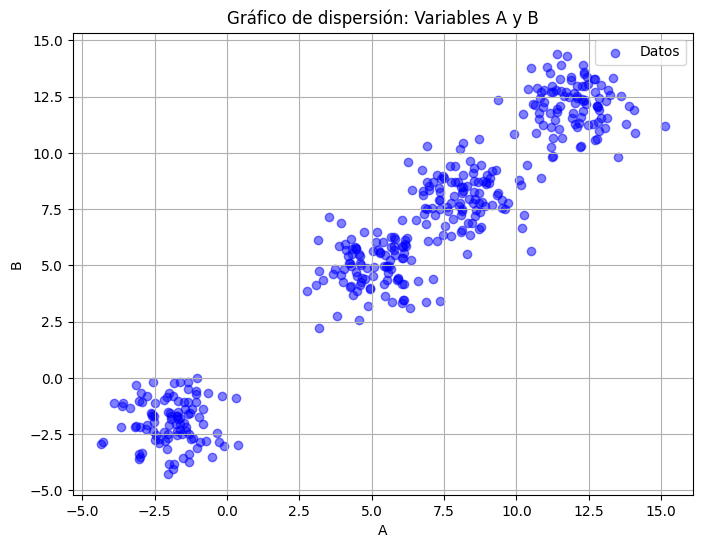

In [14]:
# #Instrucción 2.1.3.Generar gráfico de dispersión (scatter plot) de las columnas A y B
plt.figure(figsize=(8, 6))
plt.scatter(data['A'], data['B'], c='blue', alpha=0.5, label='Datos')
plt.title('Gráfico de dispersión: Variables A y B')
plt.xlabel('A')
plt.ylabel('B')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
#Instrucción 2.1.4. Aplique el algoritmo k-means (from sklearn.cluster import KMeans), observe y 
# analice los outputs disponibles (centroides, clusters asignados y distancia dentro de las clases).

kmeans = KMeans(n_clusters=3, random_state=42)

# Ajustar el modelo a los datos
kmeans.fit(data[['A', 'B']])

# Obtener los centroides, etiquetas y distancia intra-clase
centroides = kmeans.cluster_centers_
etiquetas = kmeans.labels_
inercia = kmeans.inertia_

# Imprimir resultados
print("Centroides:\n", centroides)
print("\nEtiquetas asignadas (primeros 10):", etiquetas[:10])
print("\nDistancia intra-clase:", inercia)

Centroides:
 [[11.77773707 11.90454327]
 [-1.92438992 -1.96702231]
 [ 6.51111454  6.39376554]]

Etiquetas asignadas (primeros 10): [1 1 1 1 1 1 1 1 1 1]

Distancia intra-clase: 1734.0178562808385


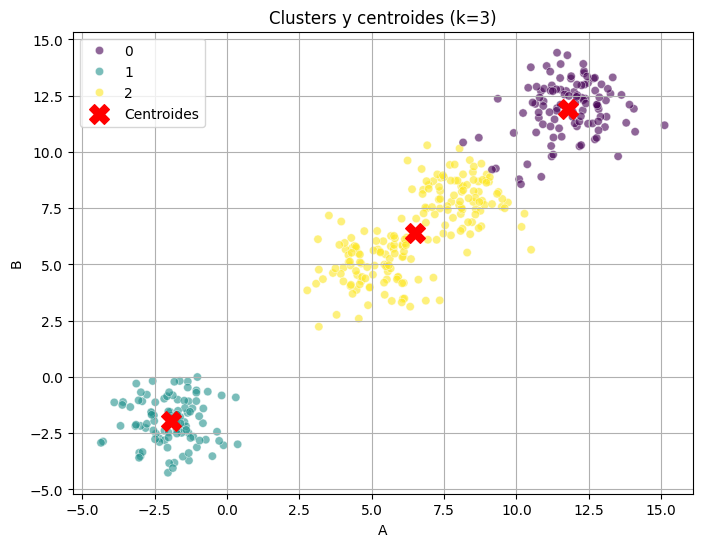

In [16]:
#grafico centroides 
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='A', y='B', hue=etiquetas, palette='viridis', alpha=0.6, legend='full')
plt.scatter(centroides[:, 0], centroides[:, 1], s=200, c='red', marker='X', label='Centroides')
plt.title('Clusters y centroides (k=3)')
plt.xlabel('A')
plt.ylabel('B')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
#Instrucción 2.1.5.  Ajuste k-means considerando 1,2,...10 clusters, guarde la distancia intra clases 
# en un diccionario.Estudie la documentacion de la clase y modifique los argumentos init, n init y max it.
resultados_inercia = {}  # Diccionario para guardar la distancia intra-clase

for k in range(1, 11):
    modelo = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    modelo.fit(data[['A', 'B']])
    resultados_inercia[k] = modelo.inertia_
resultados_inercia

{1: 21781.792975992223,
 2: 5728.22914004501,
 3: 1733.979284964782,
 4: 789.0012783558573,
 5: 715.1990495229478,
 6: 647.250836331653,
 7: 573.067758985786,
 8: 506.64781079815805,
 9: 460.9246547741196,
 10: 416.3319156674289}

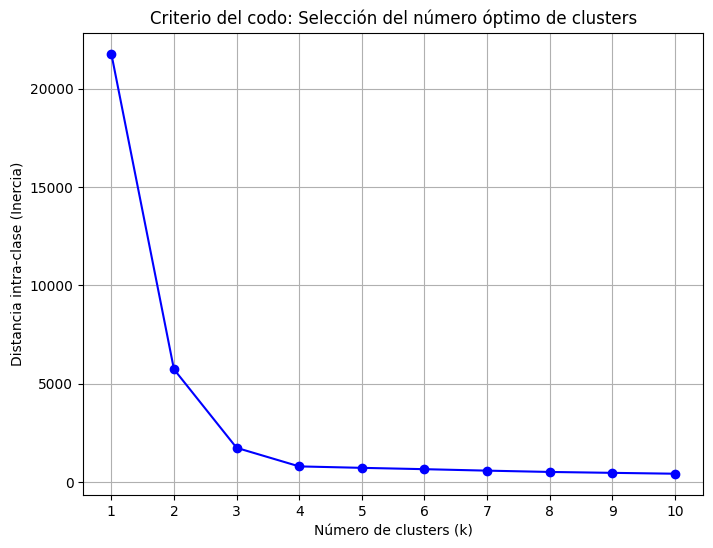

In [18]:
plt.figure(figsize=(8, 6))
plt.plot(list(resultados_inercia.keys()), list(resultados_inercia.values()), marker='o', linestyle='-', color='b')
plt.title('Criterio del codo: Selección del número óptimo de clusters')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Distancia intra-clase (Inercia)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

#Desde el cluster 3 se observa que disminuye drasticamente la distancia intra clases, 
# la cual se tiende a normalizar a medida que aumentan el numero de cluster en el eje x.

Análisis de clusters

In [29]:
#Instrucción 2.2.1 Cargar la base de datos kmeans2.csv utilizando pandas
data2 = 'C:/Users/ACER/Downloads/kmeans2.csv'  # Ruta del archivo cargado
data2 = pd.read_csv(data2)

data2.head()

,PAC_EDAD,SATO2,TEMPERATURA,GLASGOW,EVA,HGT,FR,DIAS_HOSP
0,79,89.0,35.8,15.0,3.0,121.0,14.0,21.0
1,35,96.0,36.4,15.0,2.0,121.0,16.0,33.0
2,25,98.0,35.5,15.0,2.0,121.0,18.0,17.0
3,34,98.0,37.0,15.0,2.0,121.0,18.0,1.0
4,45,98.0,36.8,15.0,2.0,121.0,18.0,11.0


In [ ]:
print("Valores nulos por columna:\n", data2.isnull().sum())
scaler = StandardScaler()
data2_normalized = scaler.fit_transform(data2)

data2_normalized = pd.DataFrame(data2_normalized, columns=data2.columns)
data2_normalized.head()

Valores nulos por columna:
 PAC_EDAD       0
SATO2          0
TEMPERATURA    0
GLASGOW        0
EVA            0
HGT            0
FR             0
DIAS_HOSP      0
dtype: int64


,PAC_EDAD,SATO2,TEMPERATURA,GLASGOW,EVA,HGT,FR,DIAS_HOSP
0,1.879269,-2.881869,-1.436581,0.099516,-0.449659,-0.575125,-1.230407,3.847996
1,0.204056,-0.400453,-0.528923,0.099516,-0.994126,-0.575125,-0.681164,6.217013
2,-0.176674,0.308523,-1.890410,0.099516,-0.994126,-0.575125,-0.131920,3.058323
3,0.165983,0.308523,0.378735,0.099516,-0.994126,-0.575125,-0.131920,-0.100367
4,0.584787,0.308523,0.076182,0.099516,-0.994126,-0.575125,-0.131920,1.873814


In [35]:
kmeans2 = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans2.fit(data2_normalized)

etiquetas2 = kmeans2.labels_
centroides2 = kmeans2.cluster_centers_

data2['Cluster'] = etiquetas2

print("Centroides:\n", centroides2)
print("\nEtiquetas asignadas (primeros 10):", etiquetas2[:10])
data2.head()

Centroides:
 [[-0.70402303  0.12400055  0.24240602  0.07938919 -0.23155756 -0.08932392
   0.19747494 -0.05898872]
 [ 1.00056122 -0.17809891 -0.34033127 -0.11332915  0.32436076  0.1275327
  -0.27609736 -0.06593413]
 [-0.19571028  0.17521597 -0.24725087  0.05978999  0.29188991 -0.06889814
  -0.28818407 11.26396573]]

Etiquetas asignadas (primeros 10): [1 2 0 0 0 1 2 1 1 1]


,PAC_EDAD,SATO2,TEMPERATURA,GLASGOW,EVA,HGT,FR,DIAS_HOSP,Cluster
0,79,89.0,35.8,15.0,3.0,121.0,14.0,21.0,1
1,35,96.0,36.4,15.0,2.0,121.0,16.0,33.0,2
2,25,98.0,35.5,15.0,2.0,121.0,18.0,17.0,0
3,34,98.0,37.0,15.0,2.0,121.0,18.0,1.0,0
4,45,98.0,36.8,15.0,2.0,121.0,18.0,11.0,0


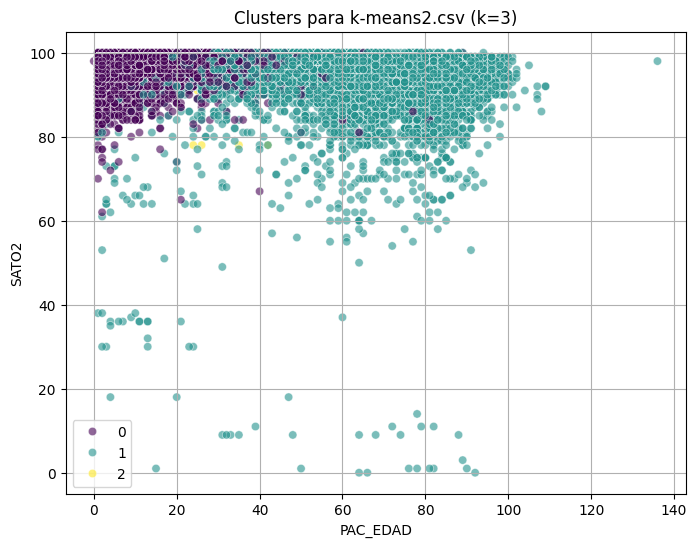

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data2, x=data2.columns[0], y=data2.columns[1], hue='Cluster', palette='viridis', alpha=0.6, legend='full')
plt.title('Clusters para k-means2.csv (k=3)')
plt.xlabel(data2.columns[0])
plt.ylabel(data2.columns[1])
plt.legend()
plt.grid(True)
plt.show()

In [44]:
# #Instrucción 2.2.2  Determine el número de clusters adecuados con alguno de los tres métodos vistos en clases (regla 
# del codo, Davies-Bouldin o Silhouette plot). Genere una función (o un conjunto de funciones) que 
# le permita obtener el reporte de las métricas y visualizaciones.

# Función para calcular y reportar el índice de Davies-Bouldin
def calcular_davies_bouldin(data, max_clusters=10):

    db_scores = {}
    for k in range(2, max_clusters + 1):  # Davies-Bouldin no se calcula para k=1
        modelo = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
        etiquetas = modelo.fit_predict(data)
        db_score = davies_bouldin_score(data, etiquetas)
        db_scores[k] = db_score
    return db_scores

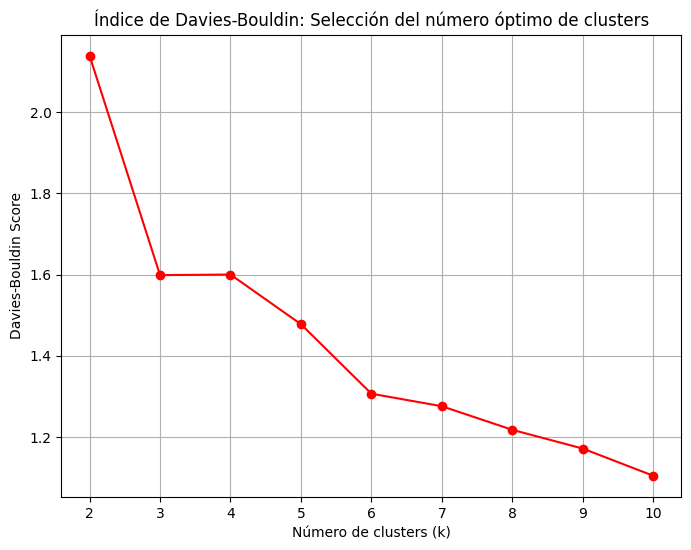

El número óptimo de clusters según Davies-Bouldin es: 10


In [ ]:
db_scores = calcular_davies_bouldin(data2_normalized)
plt.figure(figsize=(8, 6))
plt.plot(list(db_scores.keys()), list(db_scores.values()), marker='o', linestyle='-', color='r')
plt.title('Índice de Davies-Bouldin: Selección del número óptimo de clusters')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.xticks(range(2, len(db_scores) + 2))
plt.grid(True)
plt.show()
k_optimo_db = min(db_scores, key=db_scores.get)
print(f"El número óptimo de clusters según Davies-Bouldin es: {k_optimo_db}")

In [ ]:
# #Instrucción 2.2.3 Interprete los resultados de los centroides. Implemente una función que le permita analizar los 
# resultados de los centroides de forma automática. No olvide considerar la transformaciones inversas del escalamiento 
# o transformación z-score

def analizar_centroides(modelo_kmeans, scaler, columnas):
    centroides_normalizados = modelo_kmeans.cluster_centers_
   
    if len(columnas) != centroides_normalizados.shape[1]:
        raise ValueError("El número de columnas no coincide con las dimensiones de los centroides.")
    
    centroides_originales = scaler.inverse_transform(centroides_normalizados)
    centroides_df = pd.DataFrame(centroides_originales, columns=columnas)
    return centroides_df

In [53]:
columnas_relevantes = data2.drop(columns=['Cluster']).columns 
centroides_analizados = analizar_centroides(kmeans2, scaler, columnas_relevantes)
print(centroides_analizados)

    PAC_EDAD      SATO2  TEMPERATURA    GLASGOW       EVA         HGT  \
0  11.149005  97.479467    36.909881  14.992151  3.400578  163.039471   
1  55.920450  96.627253    36.524667  14.916991  4.421610  181.805445   
2  24.500000  97.623944    36.586197  14.984507  4.361972  164.807042   

          FR  DIAS_HOSP  
0  19.199451   1.209596  
1  17.474998   1.174415  
2  17.430986  58.564789  
